Data cleaning  and EDA 

In [3]:
import pandas as pd 

In [4]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [7]:
#Loading Data 
df= pd.read_csv('Musician(1).csv')
df.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [8]:
#removig Columns 
df.columns 

Index(['Rank', 'Peak', 'All Time Peak', 'Actual gross',
       'Adjusted gross (in 2022 dollars)', 'Artist', 'Tour title', 'Year(s)',
       'Shows', 'Average gross', 'Ref.'],
      dtype='object')

In [9]:
df.drop(columns=['Rank', 'Peak', 'All Time Peak','Ref.'], inplace = True)

In [10]:
df.head()

,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross
0,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571"
1,"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571"
2,"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294"
3,"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795"
4,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173"


In [11]:
df.columns

Index(['Actual gross', 'Adjusted gross (in 2022 dollars)', 'Artist',
       'Tour title', 'Year(s)', 'Shows', 'Average gross'],
      dtype='object')

In [12]:
#Renaming the header
col_rename ={'Actual\xa0gross': 'gross', 'Adjusted\xa0gross (in 2022 dollars)(in 2022 dollars)' :'adj_gross', 'Artist':'artist',
       'Tour title' : 'tour' , 'Year(s)': 'year', 'Shows': 'shows', 'Average gross ': 'avg_gross'}


In [13]:
df.rename(columns = col_rename, inplace = True)

In [14]:
df.head()

,gross,Adjusted gross (in 2022 dollars),artist,tour,year,shows,Average gross
0,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571"
1,"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571"
2,"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294"
3,"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795"
4,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173"


In [15]:
df.columns.tolist() 

['gross',
 'Adjusted\xa0gross (in 2022 dollars)',
 'artist',
 'tour',
 'year',
 'shows',
 'Average gross']

In [16]:
df.columns = df.columns.str.encode('ascii', 'ignore').str.decode('ascii')

In [17]:
df.columns 

Index(['gross', 'Adjustedgross (in 2022 dollars)', 'artist', 'tour', 'year',
       'shows', 'Average gross'],
      dtype='object')

In [18]:
df.rename(columns ={'Actual\xa0gross': 'gross', 'Adjustedgross (in 2022 dollars)' :'adj_gross', 'Average gross' : 'avg_gross'}, inplace  = True)

In [19]:
df.tail()

,gross,adj_gross,artist,tour,year,shows,avg_gross
15,"$184,000,000","$227,452,347",Pink,The Truth About Love Tour,2013–2014,142,"$1,295,775"
16,"$170,000,000","$213,568,571",Lady Gaga,Born This Way Ball,2012–2013,98,"$1,734,694"
17,"$169,800,000","$207,046,755",Madonna,Rebel Heart Tour,2015–2016,82,"$2,070,732"
18,"$167,700,000[e]","$204,486,106",Adele,Adele Live 2016,2016–2017,121,"$1,385,950"
19,"$150,000,000","$185,423,109",Taylor Swift,The Red Tour,2013–2014,86,"$1,744,186"


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gross      20 non-null     object
 1   adj_gross  20 non-null     object
 2   artist     20 non-null     object
 3   tour       20 non-null     object
 4   year       20 non-null     object
 5   shows      20 non-null     int64 
 6   avg_gross  20 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.2+ KB


In [21]:
df.gross.sample(5)

12    $204,000,000
6     $280,000,000
15    $184,000,000
19    $150,000,000
0     $780,000,000
Name: gross, dtype: object

In [22]:
df.gross.str.replace('$','').str.replace(',','')

0        780000000
1        579800000
2        411000000
3        397300000
4        345675146
5        305158363
6        280000000
7        257600000
8        256084556
9        250400000
10    229100000[b]
11       227400000
12       204000000
13       200000000
14       194000000
15       184000000
16       170000000
17       169800000
18    167700000[e]
19       150000000
Name: gross, dtype: object

In [23]:
#df['gross'] = df.gross.str.replace(r'[^\d.]', '', regex = True)
                                   

In [24]:
col_to_cleaned = ['gross', 'adj_gross', 'avg_gross']

In [25]:
for col in  col_to_cleaned:
    df[col] = df[col].str.replace(r'[^\d.]', '', regex = True)

df.head()

,gross,adj_gross,artist,tour,year,shows,avg_gross
0,780000000,780000000,Taylor Swift,The Eras Tour †,2023–2024,56,13928571
1,579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571
2,411000000,560622615,Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,4835294
3,397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795
4,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gross      20 non-null     object
 1   adj_gross  20 non-null     object
 2   artist     20 non-null     object
 3   tour       20 non-null     object
 4   year       20 non-null     object
 5   shows      20 non-null     int64 
 6   avg_gross  20 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.2+ KB


In [27]:
pd.to_numeric(df.gross)

0     780000000
1     579800000
2     411000000
3     397300000
4     345675146
5     305158363
6     280000000
7     257600000
8     256084556
9     250400000
10    229100000
11    227400000
12    204000000
13    200000000
14    194000000
15    184000000
16    170000000
17    169800000
18    167700000
19    150000000
Name: gross, dtype: int64

In [28]:
for col in  col_to_cleaned:
    df[col] = pd.to_numeric(df[col])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gross      20 non-null     int64 
 1   adj_gross  20 non-null     int64 
 2   artist     20 non-null     object
 3   tour       20 non-null     object
 4   year       20 non-null     object
 5   shows      20 non-null     int64 
 6   avg_gross  20 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 1.2+ KB


In [30]:
#df.gross.astype(int)

In [31]:
df.sample(5)

,gross,adj_gross,artist,tour,year,shows,avg_gross
12,204000000,251856802,Katy Perry,Prismatic World Tour,2014–2015,151,1350993
0,780000000,780000000,Taylor Swift,The Eras Tour †,2023–2024,56,13928571
16,170000000,213568571,Lady Gaga,Born This Way Ball,2012–2013,98,1734694
9,250400000,309141878,Taylor Swift,The 1989 World Tour,2015,85,2945882
13,200000000,299676265,Cher,Living Proof: The Farewell Tour ‡[21][a],2002–2005,325,615385


In [32]:
df.year.sample(8)

11    2009–2011
14         2006
8          2016
13    2002–2005
7     2023–2024
9          2015
3     2018–2019
12    2014–2015
Name: year, dtype: object

In [33]:
df.year.str.split('-')

0     [2023–2024]
1          [2023]
2     [2008–2009]
3     [2018–2019]
4          [2018]
5          [2012]
6     [2008–2009]
7     [2023–2024]
8          [2016]
9          [2015]
10    [2013–2014]
11    [2009–2011]
12    [2014–2015]
13    [2002–2005]
14         [2006]
15    [2013–2014]
16    [2012–2013]
17    [2015–2016]
18    [2016–2017]
19    [2013–2014]
Name: year, dtype: object

In [34]:
df.year[2][-4:]

'2009'

In [35]:
def extract_year(value):
    return value[-4:] if len(value)> 4 else value

In [36]:
df['year'] =df.year.apply(extract_year)

In [37]:
df.head()

,gross,adj_gross,artist,tour,year,shows,avg_gross
0,780000000,780000000,Taylor Swift,The Eras Tour †,2024,56,13928571
1,579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571
2,411000000,560622615,Madonna,Sticky & Sweet Tour ‡[4][a],2009,85,4835294
3,397300000,454751555,Pink,Beautiful Trauma World Tour,2019,156,2546795
4,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173


In [38]:
df.to_excel('Tour_cleaned.xlsx')

EXPLORATORY DATA ANALYSIS (EDA)

In [40]:
#Summary report 
df.describe().round(1)

,gross,adj_gross,shows,avg_gross
count,20.0,20.0,20.0,20.0
mean,287950903.2,343878092.0,110.0,3726571.2
std,156328421.0,151462683.7,66.5,3393339.6
min,150000000.0,185423109.0,41.0,615385.0
25%,191500000.0,245755688.2,59.0,1647508.0
50%,239750000.0,297488872.0,87.0,2342100.0
75%,315287558.8,392445084.2,134.5,4933024.2
max,780000000.0,780000000.0,325.0,13928571.0


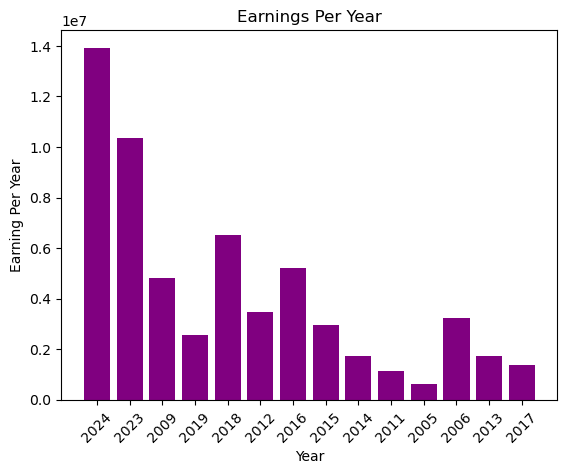

In [140]:
#Earning Per Year 
x =df.avg_gross
y = df.year

plt.bar(y, x, color ='purple')

plt.xticks(rotation=45)
plt.title('Earnings Per Year')

plt.ylabel('Earning Per Year')

plt.xlabel('Year')

plt.show()


In [116]:
#Earning Per Artist 
df.groupby('artist')[['avg_gross']].sum().reset_index().sort_values(by='avg_gross', ascending=False)

,artist,avg_gross
8,Taylor Swift,25140812
1,Beyoncé,17315392
6,Madonna,13607068
7,Pink,10125497
5,Lady Gaga,2852921
2,Celine Dion,2137405
0,Adele,1385950
4,Katy Perry,1350993
3,Cher,615385


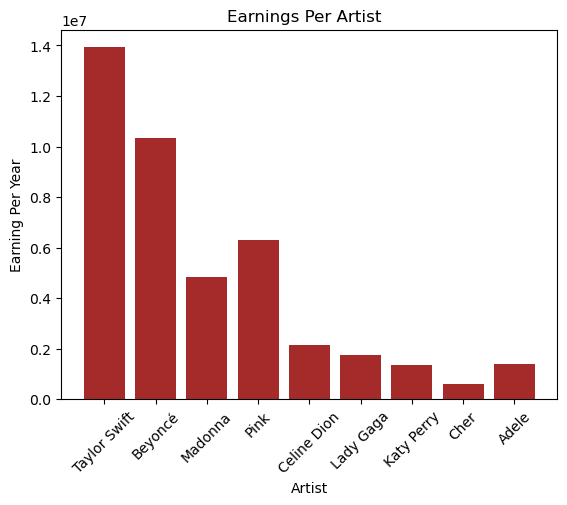

In [134]:
#Earning Per Artist Visuals
x =df.avg_gross
y = df.artist

plt.bar(y, x, color ='Brown')

plt.xticks(rotation=45)
plt.title('Earnings Per Artist  ')

plt.ylabel('Earning Per Year')

plt.xlabel('Artist')

plt.show()

<Axes: xlabel='shows', ylabel='avg_gross'>

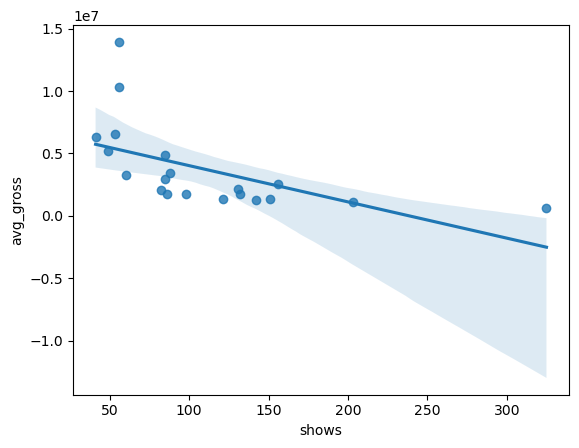

In [144]:
#Impact of shows on earning
sns.regplot(x= 'shows', y= 'avg_gross', data = df)